# MLB Analytics Portfolio – Visual Exploration Notebook

This notebook provides the visual and analytical companion to the **MLB SQL Portfolio Project**, which uses the Lahman Baseball Database (1871–2024) to explore player development, team payroll dynamics, career trajectories, and cross-era player comparisons.  
All datasets used here are exported directly from the project’s SQL queries and stored in `data/output/`.

Only the **most interesting and insightful findings** from each part of the SQL analysis are visualised here.  
This selective approach keeps the notebook focused, readable, and aligned with the narrative value of the project, rather than reproducing every query output.

The notebook mirrors the structure of the SQL project:

- **Part I — Talent Pipeline & Player Origins**  
  How MLB player sources (schools, states, and long-career contributors) have changed over time.

- **Part II — Payroll & Team Economics**  
  Financial inequality in MLB, long-term spending trends, and the relationship between payroll and postseason success.

- **Part III — MLB Career Dynamics**  
  Debut age, longevity, franchise loyalty, and differences between Hall-of-Famers and typical MLB careers.

- **Part IV — Player Comparison & Physical Profiles**  
  Debut characteristics, positional differences, and league- or era-specific player profiles.

Each section loads pre-computed SQL outputs and visualises them using Python to reveal broader trends, structural patterns, and key insights.  
Interpretations are provided alongside each figure to connect database queries with meaningful baseball analytics.


### Import libraries

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Part I - Talent Pipeline & Player Origins

## Q1.2 — Number of Schools Producing MLB Players by Decade

This question examines how many different schools produced at least one MLB player in each debut decade.  
The goal is to visualise the growth of the MLB talent pipeline over time and identify periods of expansion or stagnation in collegiate player production.

**Data source:** `q1_2.csv` (output of SQL query Q1.2)  

In [122]:
q1_2 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q1_2.csv")
q1_2.head()

,debut_decade,num_schools
0,1870,11
1,1880,24
2,1890,63
3,1900,116
4,1910,172


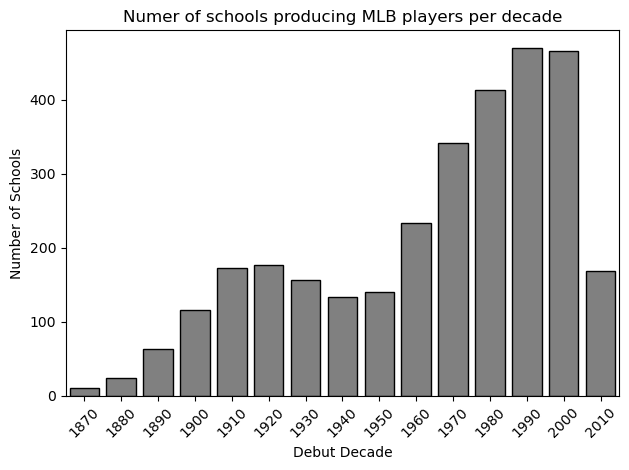

In [123]:
sns.barplot(x = 'debut_decade', y = 'num_schools', data = q1_2, 
            color='grey', edgecolor="black" )
plt.xlabel('Debut Decade')
plt.xticks(rotation=45)
plt.ylabel('Number of Schools')
plt.title('Number of schools producing MLB players per decade')
plt.tight_layout()

This figure shows the number of different schools that produced at least one MLB player in each debut decade from 1870 to 2010. The trend reveals a steady expansion of the collegiate talent pipeline throughout the 20th century, peaking in the 1980s and 1990s when more than 450 schools contributed players to MLB. The post-2000 decline likely reflects the incomplete nature of the most recent decades in the dataset.

## Q1.4 — Top MLB-Producing Schools by Decade (Heatmap)

This question identifies which schools produced the most MLB players in each debut decade and visualises how program dominance has shifted over time.  
The goal is to highlight long-term trends in collegiate talent pipelines by comparing top-producing schools across different historical periods.

**Data source:** `q1_4.csv` (output of SQL query Q1.4)


In [124]:
q1_4 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q1_4.csv")
q1_4.head()

,debut_decade,schoolid,num_players
0,1870,brown,2
1,1870,fordham,2
2,1870,yale,2
3,1880,yale,6
4,1880,brown,3


In [125]:
# Need to create a matrix for a heatmap
pivot_df = q1_4.pivot(index='schoolid', 
                      columns='debut_decade', 
                      values='num_players')
pivot_df.head()

debut_decade,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
schoolid,,,,,,,,,,,,,,,
alabama,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arizonast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,24.0,24.0,18.0,NaN,11.0
brown,2.0,3.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
california,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
calstfull,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN


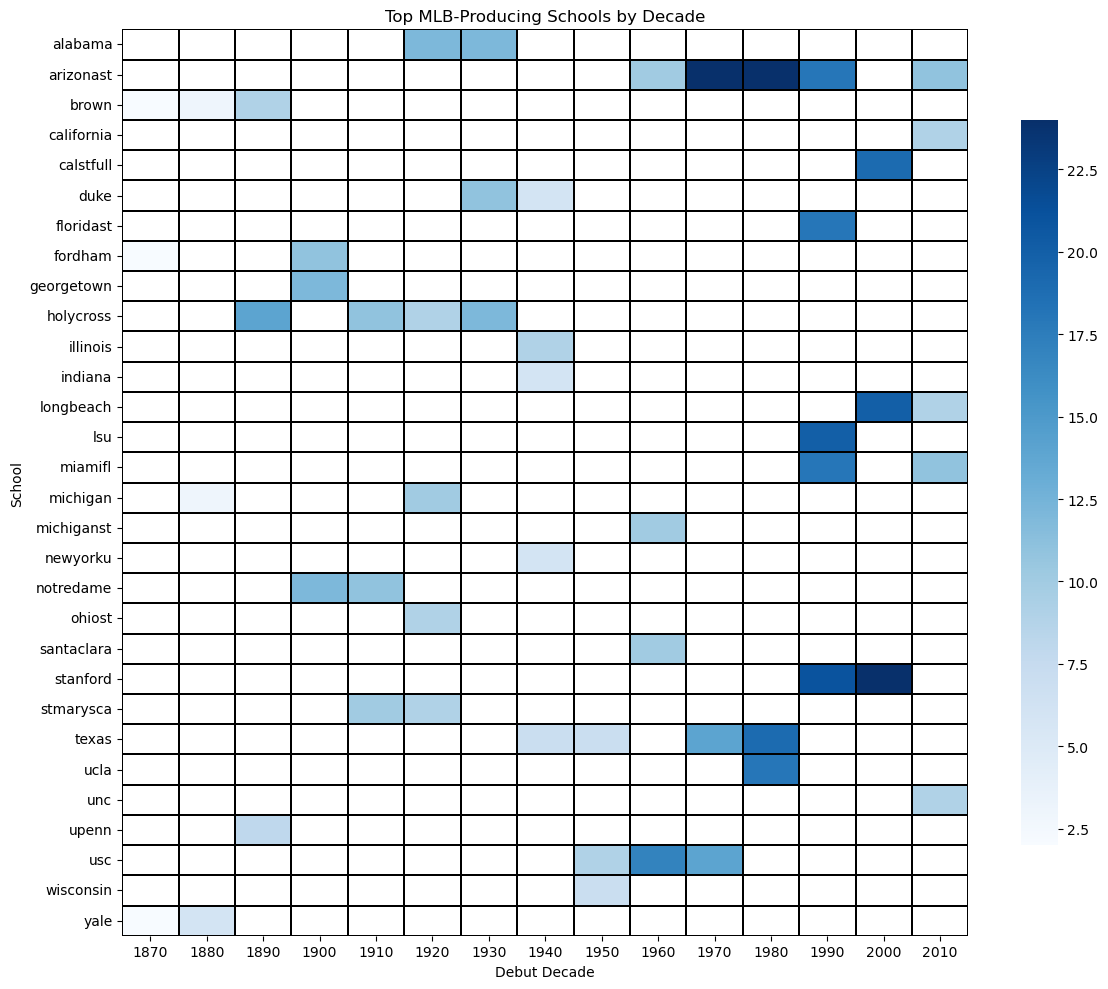

In [126]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    pivot_df,
    cmap="Blues",
    linewidths=0.2,
    linecolor="black",
    cbar_kws={"shrink": 0.8}
)

plt.title("Top MLB-Producing Schools by Decade")
plt.xlabel("Debut Decade")
plt.ylabel("School")

# Make sure labels align with cell centers
plt.yticks(rotation=0, va='center')

plt.tight_layout()
plt.show()


The heatmap shows how a selected set of top colleges contributed MLB players across debut decades, with colour intensity indicating how many players debuted in each decade–school combination. Early decades show only isolated contributions, but from the mid-20th century onward a few programs emerge as consistent high-output producers (for example Miami, UCLA, St. Mary’s, and LSU in the late 20th century). No school dominates across all decades; instead, different programs peak at different times, reflecting shifts in recruiting, coaching strength, and NCAA competitiveness. Overall, the figure illustrates how the college baseball talent pipeline into MLB is dynamic, with centres of influence moving across schools and eras rather than being historically fixed.

## Q1.7 — State Growth Rates in MLB Player Production Since 1950

This question measures how MLB player production has changed across U.S. states by estimating each state's decadal growth rate in debuting players since 1950. Using linear slopes from the SQL analysis, we can identify which states have expanded their talent pipelines the fastest and which have remained stable or declined. The visualisation highlights geographic shifts in player development and the emergence of new high-output regions over the modern era.

**Data source:** `q1_7.csv` (output of SQL query Q1.7)


In [127]:
q1_7 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q1_7.csv")
q1_7.head()

,state,slope_growth
0,CA,17.36
1,TX,13.04
2,FL,13.00
3,SC,5.21
4,LA,5.07


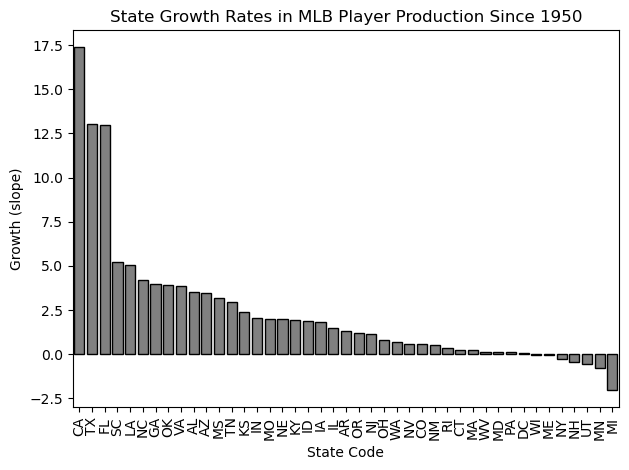

In [128]:
sns.barplot(x = 'state', y = 'slope_growth', data = q1_7, 
            color='grey', edgecolor="black")
plt.xlabel('State Code')
plt.xticks(rotation=90)
plt.ylabel('Growth (slope)')
plt.title('State Growth Rates in MLB Player Production Since 1950')
plt.tight_layout()

This barplot shows how MLB player production has grown across U.S. states since 1950, measured using linear slopes from the SQL analysis. A few states—most notably California, Texas, and Florida—show exceptionally strong growth, reflecting their expansion as major baseball talent hubs. Many other states exhibit moderate positive trends, while a handful show flat or slightly negative growth, indicating stable or shrinking pipelines. Overall, the figure highlights the increasing dominance of warm-weather, high-population states in modern MLB player development.


# Part II — Payroll & Team Economics

## Q2.3 — Cumulative Payroll Trajectories of MLB Franchises

This question examines how team payrolls have grown over time by calculating each franchise’s cumulative total payroll across seasons. Visualising these trajectories highlights long-term spending patterns, reveals which teams have historically invested the most in players, and shows how financial inequality has widened across MLB. The plot helps contextualise differences in team resources and provides a foundation for later analyses linking payroll to postseason success.

**Data source:** `q2_3.csv` (output of SQL query Q2.3)


In [129]:
q2_3 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q2_3.csv")
q2_3.head()

,teamid,yearid,annual_payroll,cumulative_payroll
0,ANA,1997,31135472,31135472
1,ANA,1998,41281000,72416472
2,ANA,1999,55388166,127804638
3,ANA,2000,51464167,179268805
4,ANA,2001,47535167,226803972


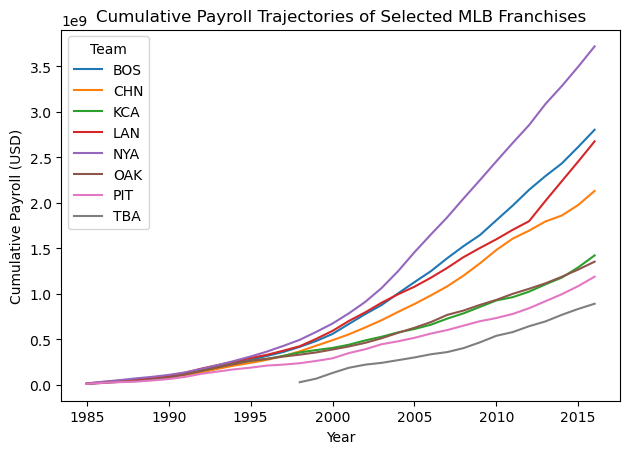

In [130]:
# Pick a small set of franchises to highlight
focus_teams = ["NYA", "BOS", "LAN", "CHN",
               "OAK", "TBA", "KCA", "PIT"]

df_focus = q2_3[q2_3["teamid"].isin(focus_teams)]

sns.lineplot(
    data=df_focus,
    x='yearid',
    y='cumulative_payroll',
    hue='teamid'
)

plt.title("Cumulative Payroll Trajectories of Selected MLB Franchises")
plt.xlabel("Year")
plt.ylabel("Cumulative Payroll (USD)")
plt.legend(title="Team", loc="upper left")
plt.tight_layout()


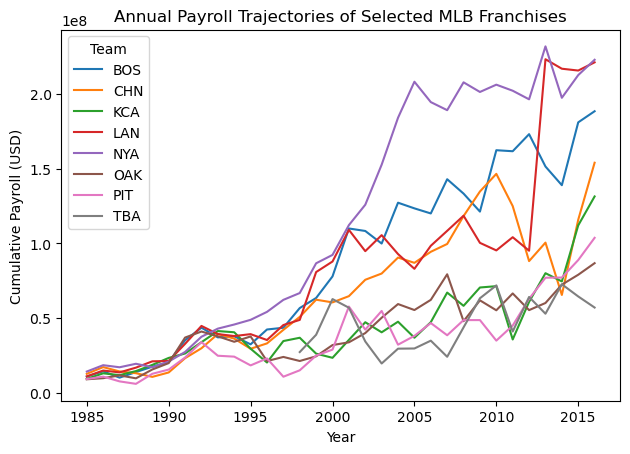

In [131]:
# Pick a small set of franchises to highlight
focus_teams = ["NYA", "BOS", "LAN", "CHN",
               "OAK", "TBA", "KCA", "PIT"]

df_focus = q2_3[q2_3["teamid"].isin(focus_teams)]

sns.lineplot(
    data=df_focus,
    x='yearid',
    y='annual_payroll',
    hue='teamid'
)

plt.title("Annual Payroll Trajectories of Selected MLB Franchises")
plt.xlabel("Year")
plt.ylabel("Cumulative Payroll (USD)")
plt.legend(title="Team", loc="upper left")
plt.tight_layout()


These two payroll visualisations highlight the widening financial divide between MLB franchises by contrasting long-term cumulative spending with year-to-year payroll behaviour.

The cumulative payroll plot shows the clearest structural gap: high-spending franchises such as the Yankees (NYA), Red Sox (BOS), Dodgers (LAN), and Cubs (CHN) pull dramatically ahead of lower-spending clubs like the Royals (KCA), Athletics (OAK), Pirates (PIT), and Rays (TBA). Because cumulative values stack over decades, the separation between top- and bottom-spending teams becomes increasingly pronounced, revealing a long-run inequality in financial capacity that shapes competitive balance.

The annual payroll plot adds short-term context. All teams increase spending from the mid-1990s onward, but the lower-spending clubs consistently remain at the bottom of the distribution, with smaller peaks and more volatility driven by rebuild cycles or resource constraints. In contrast, top spenders not only operate at higher baselines but also exhibit sustained periods of aggressive investment during competitive windows.

Viewed together, the two plots highlight:

- **Macro-level inequality:** Decades of higher investment create an expanding structural gap between top and bottom franchises.
- **Micro-level dynamics:** Annual spending patterns reveal competitive windows, rebuilds, volatility, and financial strategy differences.

This dual perspective provides a comprehensive view of how payroll behaviour evolves and why certain franchises maintain consistent competitive advantages over time.


## Q2.6 — Postseason Outcomes by Annual Payroll Rank

This question evaluates how a team’s **payroll rank in a given season** relates to its likelihood of reaching the postseason.  
For each year since 1995, all teams are ranked from **1 (highest payroll)** downward based on total salary expenditure. These “team-seasons” are then matched to postseason results, allowing us to count:

- how many times a team with payroll rank *r* made the postseason  
- how many times teams at the same rank missed the postseason  

This produces a clean, rank-based view of payroll effectiveness rather than grouping teams into tiers or percentiles.

Because the ranking resets every year, this method captures **relative spending power within each season**, controlling for league-wide growth in salaries over time.

The resulting distribution makes the pattern very clear:  
teams with top-ranked payrolls reach the postseason far more often, while teams ranked near the bottom almost never qualify. This rank-wise comparison highlights how financial investment translates into competitive advantage within each season and quantifies the steep drop-off in success as payroll rank increases.

**Data source:** `q2_6.csv` (output of SQL query Q2.6)

In [132]:
q2_6 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q2_6.csv")
q2_6.head()

,payroll_rank,postseason_team_seasons,non_postseason_team_seasons
0,1,17,5
1,2,11,11
2,3,6,16
3,4,12,10
4,5,10,12


In [133]:
df_long = q2_6.melt(
    id_vars=['payroll_rank'],
    value_vars=['postseason_team_seasons', 'non_postseason_team_seasons'],
    var_name='category',
    value_name='seasons'
)

df_long['category'] = df_long['category'].replace({
    'postseason_team_seasons': 'Postseason',
    'non_postseason_team_seasons': 'Non-Postseason'
})

df_long


,payroll_rank,category,seasons
0,1,Postseason,17
1,2,Postseason,11
2,3,Postseason,6
3,4,Postseason,12
4,5,Postseason,10
5,6,Postseason,14
6,7,Postseason,8
7,8,Postseason,10
8,9,Postseason,9
9,10,Postseason,7


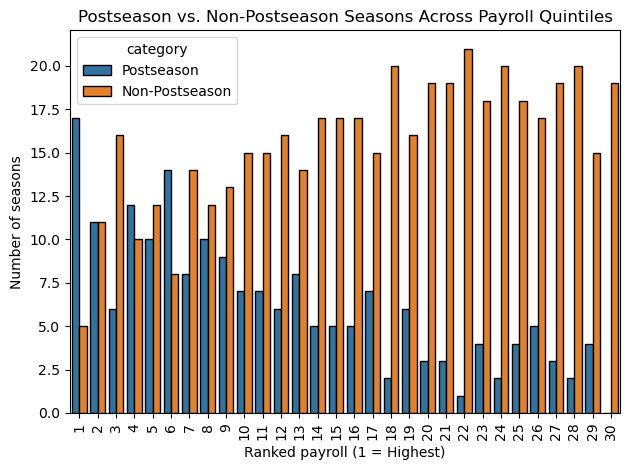

In [134]:
sns.barplot(x = 'payroll_rank', y = 'seasons', data = df_long, 
            hue='category', edgecolor="black")
plt.xlabel('Ranked payroll (1 = Highest)')
plt.xticks(rotation=90)
plt.ylabel('Number of seasons')
plt.title('Postseason vs. Non-Postseason Seasons Across Payroll Quintiles')
plt.tight_layout()

This plot examines how often teams reach the postseason based on their **annual payroll rank** (1 = highest payroll in that season, 30 = lowest).  
The pattern is straightforward and intuitive:

- Teams with **higher payroll ranks**—meaning they spend more relative to other teams that year—reach the postseason far more frequently.
- As payroll rank decreases, postseason appearances steadily decline.
- By the time we reach the **bottom 10 payroll teams**, postseason seasons become rare compared to non-postseason seasons.

In other words, the data shows that **teams spending more in a given season have a significantly better chance of making the postseason**, while teams spending less generally struggle to qualify.  
This does not imply money *guarantees* postseason success, but it does highlight that **higher financial investment strongly increases the probability** of competing in October.

The rank-based approach makes the relationship unambiguous:  
**the further down the payroll ladder a team falls in a season, the lower their odds of reaching the postseason.**

# Part III — Player Career Analysis

## Q3.2 — Career Timing: Debut Age, Retirement Age, and Career Length

This question builds a per-player timeline of MLB careers by calculating three key metrics: age at debut, age at last game, and total career length in years. These values reveal the demographic structure of MLB careers — when players typically enter the league, when they leave it, and how long their careers last. While a small number of players sustain exceptionally long, multi-decade careers, the majority have far shorter tenures, often only a few seasons. By visualising the distributions of debut age, retirement age, and career length, we can see how skewed career longevity is and how early entry into MLB often relates to longer playing careers. This dataset also forms the foundation for later comparisons between Hall of Fame players and the broader population.

In [135]:
q3_2 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q3_2.csv")
q3_2.head()

,playerid,age_first_game,age_last_game,career_length
0,altroni01,21 years 9 mons 29 days,57 years 16 days,35 years 2 mons 18 days
1,orourji01,21 years 7 mons 25 days,54 years 21 days,32 years 4 mons 26 days
2,minosmi01,25 years 4 mons 20 days,56 years 10 mons 6 days,31 years 5 mons 16 days
3,olearch01,28 years 5 mons 30 days,58 years 11 mons 15 days,30 years 5 mons 16 days
4,lathaar01,20 years 3 mons 21 days,49 years 6 mons 15 days,29 years 2 mons 25 days


In [136]:
q3_2['age_first_game'] = q3_2['age_first_game'].str[:2].astype(int)
q3_2['age_last_game'] = q3_2['age_last_game'].str[:2].astype(int)
q3_2['career_length'] = q3_2['career_length'].str[:2].astype(int)
q3_2

,playerid,age_first_game,age_last_game,career_length
0,altroni01,21,57,35
1,orourji01,21,54,32
2,minosmi01,25,56,31
3,olearch01,28,58,30
4,lathaar01,20,49,29
...,...,...,...,...
19153,yingljo01,19,19,0
19154,youngjb01,35,35,0
19155,yountla01,21,21,0
19156,zelleba01,28,28,0


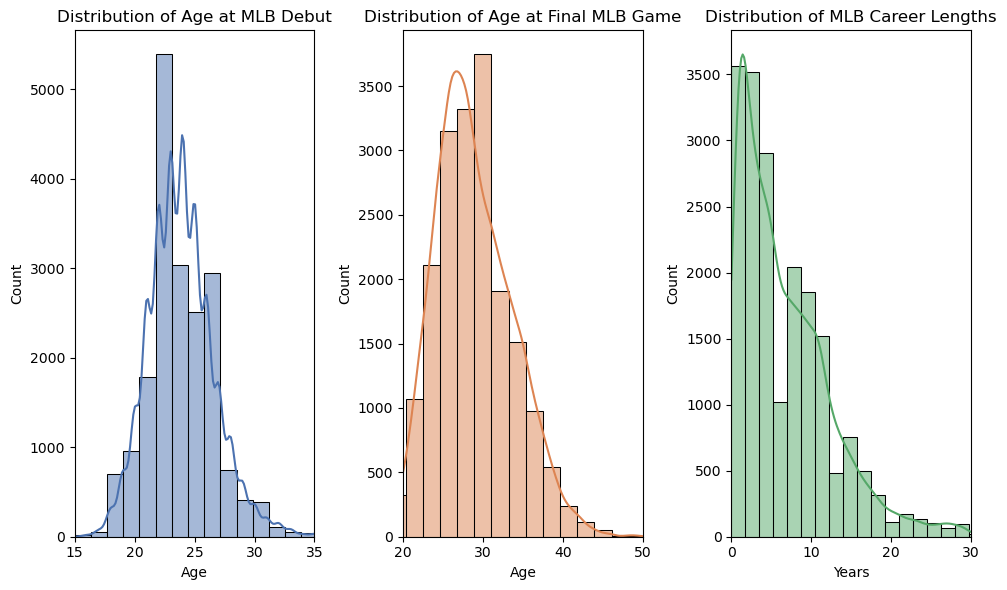

In [137]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

# --- 1. Debut age ---
sns.histplot(
    q3_2["age_first_game"], kde=True, bins=20,
    color="#4C72B0", ax=axes[0]
)
axes[0].set_title("Distribution of Age at MLB Debut")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].set_xlim(15, 35)

# --- 2. Final-game age ---
sns.histplot(
    q3_2["age_last_game"], kde=True, bins=20,
    color="#DD8452", ax=axes[1]
)
axes[1].set_title("Distribution of Age at Final MLB Game")
axes[1].set_xlabel("Age")
axes[1].set_xlim(20, 50)

# --- 3. Career length ---
sns.histplot(
    q3_2["career_length"], kde=True, bins=20,
    color="#55A868", ax=axes[2]
)
axes[2].set_title("Distribution of MLB Career Lengths")
axes[2].set_xlabel("Years")
axes[2].set_xlim(0, 30)

plt.tight_layout()


The three distributions capture the structure of MLB career timelines. Players typically debut in their early twenties, with a clear peak around ages 22–24 and very few debuts after age 30. In contrast, retirement ages span a much wider range: while many players exit the league in their late twenties or early thirties, the distribution stretches into the mid-40s, reflecting a small number of exceptionally long-lived careers.

Career length is heavily left-skewed. The majority of players last only a few seasons, and the frequency declines sharply as career length increases. Only a small subset of players reach double-digit seasons, and multi-decade careers are rare outliers. Together, these distributions show that MLB careers generally begin young, end over a broad age band, and are typically much shorter than the handful of iconic long careers might suggest.

## Q3.5 — Longest MLB Careers (Top 20)

This question identifies the players with the longest careers in MLB history by calculating the number of years between their debut and final season, then selecting the top twenty cases. Along with career length, the data includes each player's debut team and final team, highlighting both franchise stability and career mobility among the league’s most persistent players. This allows us to examine which players sustained multi-decade careers, how long those careers actually lasted, and whether the longest-tenured players tended to remain with a single franchise or move between clubs over time.

**Data source:** `q3_5.csv` (output of SQL query Q3.5)

In [138]:
q3_5 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q3_5.csv")
q3_5.head()

,playerid,debut_year,final_year,debut_team,final_team,career_length
0,altroni01,1898,1933,LS3,WS1,35
1,orourji01,1872,1904,MID,NY1,32
2,minosmi01,1949,1980,CLE,CHA,31
3,olearch01,1904,1934,DET,SLA,30
4,lathaar01,1880,1909,BFN,NY1,29


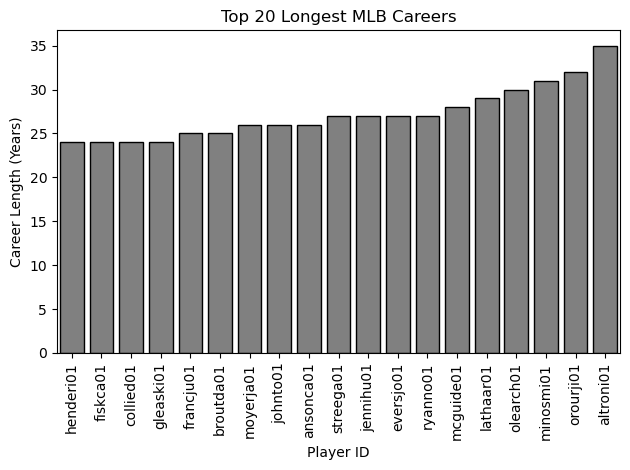

In [139]:
sns.barplot(
    data = q3_5.sort_values('career_length', ascending=True),
    x = 'playerid',
    y = 'career_length',
    color='grey', edgecolor="black" 
)

plt.xlabel('Player ID')
plt.xticks(rotation=90)
plt.ylabel('Career Length (Years)')
plt.title("Top 20 Longest MLB Careers")
plt.tight_layout()

## Q3.6 — Hall of Fame vs. Non–Hall of Fame Career Profiles

This question compares the career timelines of Hall of Fame players with those of the broader MLB population. For every player with complete date information, I compute their age at debut and their total career length, then separate them into Hall of Fame inductees and non-inductees. By summarising the typical (median) values and visualising their distributions, this analysis highlights how Hall of Famers differ from the average MLB player in terms of when they enter the league and how long they remain in it. The resulting patterns reveal whether Hall of Fame players tend to debut younger, sustain longer careers, or otherwise follow distinct developmental trajectories.

**Data source:** `q3_6.csv` (output of SQL query Q3.6)


In [140]:
q3_6 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q3_6.csv")
q3_6.head()

,hof,median_age_debut,min_age_debut,max_age_debut,median_career_length,min_career_length,max_career_length
0,Y,21 years 7 mons 18 days,17 years 1 mon 25 days,42 years 2 days,17 years 2 mons 9 days,00:00:00,32 years 4 mons 26 days
1,N,23 years 9 mons 23 days,15 years 10 mons 11 days,42 years 2 days,5 years 2 mons 27 days,00:00:00,35 years 2 mons 18 days


In [141]:
q3_6['median_age_debut'] = q3_6['median_age_debut'].str[:2].astype(int)
q3_6['min_age_debut'] = q3_6['min_age_debut'].str[:2].astype(int)
q3_6['max_age_debut'] = q3_6['max_age_debut'].str[:2].astype(int)
q3_6['median_career_length'] = q3_6['median_career_length'].str[:2].astype(int)
q3_6['min_career_length'] = q3_6['min_career_length'].str[:2].astype(int)
q3_6['max_career_length'] = q3_6['max_career_length'].str[:2].astype(int)
q3_6

,hof,median_age_debut,min_age_debut,max_age_debut,median_career_length,min_career_length,max_career_length
0,Y,21,17,42,17,0,32
1,N,23,15,42,5,0,35


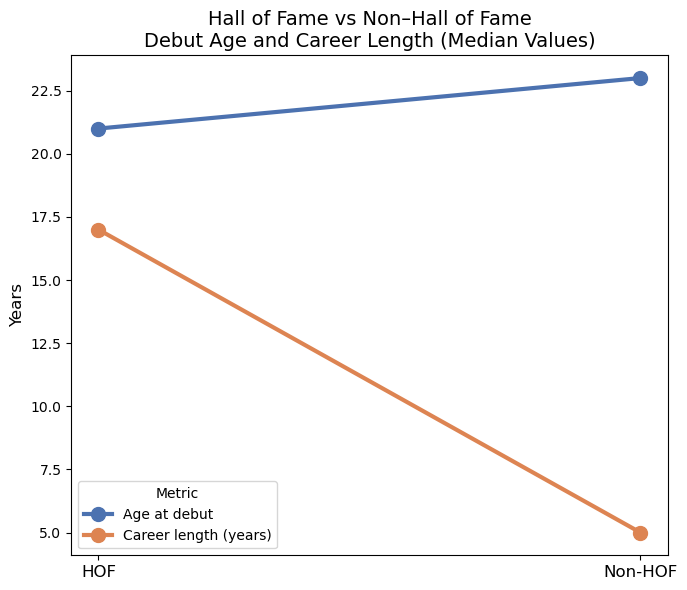

In [142]:
# Extract values
hof = q3_6[q3_6["hof"] == "Y"]
nonhof = q3_6[q3_6["hof"] == "N"]

# Values
debut_hof  = hof["median_age_debut"].values[0]
debut_non  = nonhof["median_age_debut"].values[0]

career_hof = hof["median_career_length"].values[0]
career_non = nonhof["median_career_length"].values[0]

fig, ax = plt.subplots(figsize=(7,6))

# X positions for the two groups
x_hof = 0
x_non = 1

# --- Debut age slope ---
ax.plot(
    [x_hof, x_non],
    [debut_hof, debut_non],
    color="#4C72B0",
    linewidth=3,
    marker="o",
    markersize=10,
    label="Age at debut"
)

# --- Career length slope ---
ax.plot(
    [x_hof, x_non],
    [career_hof, career_non],
    color="#DD8452",
    linewidth=3,
    marker="o",
    markersize=10,
    label="Career length (years)"
)

# Axes setup
ax.set_xticks([0, 1])
ax.set_xticklabels(["HOF", "Non-HOF"], fontsize=12)
ax.set_ylabel("Years", fontsize=12)

ax.set_title(
    "Hall of Fame vs Non–Hall of Fame\nDebut Age and Career Length (Median Values)",
    fontsize=14
)

ax.legend(title="Metric")
plt.tight_layout()


The slope chart shows two opposing trends when comparing Hall of Famers (HOF) with non–Hall of Famers.  
First, the median age at debut increases from HOF to non-HOF players. This indicates that Hall of Famers typically reach MLB at a younger age, which may give them more time to develop, produce high-value seasons, and build Hall-worthy careers.

In contrast, the median career length moves in the opposite direction, decreasing sharply from HOF to non-HOF players. Hall of Famers sustain much longer MLB careers, while non-HOF players tend to remain in the league only briefly.

These opposing slopes visually highlight the structural difference between the two groups:  
Hall of Famers debut earlier and play substantially longer, whereas non-HOF players enter later and leave sooner.
This dual pattern captures why Hall of Famers stand apart from the broader MLB population.


## Q3.7 — Primary Franchise of Hall of Famers

This question identifies which MLB franchises have the **highest number of Hall of Fame players primarily associated with them**. For each Hall of Famer, we determine the team for which they played the most career games — their primary franchise — by summing all recorded appearances across teams. We then count how many Hall of Famers each franchise “owns” as their longest-tenured club.

This gives a franchise-level view of where the greatest careers in MLB history were most deeply rooted, highlighting which organisations have historically attracted, developed, or retained the largest number of legendary players.

**Data source:** `q3_7.csv`

In [143]:
q3_7 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q3_7.csv")
q3_7.head()

,teamid,hof_count
0,NYA,23
1,NY1,19
2,SLN,19
3,CHN,18
4,CHA,15


Text(0.5, 1.0, 'Primary Franchise Counts Among Hall of Fame Players')

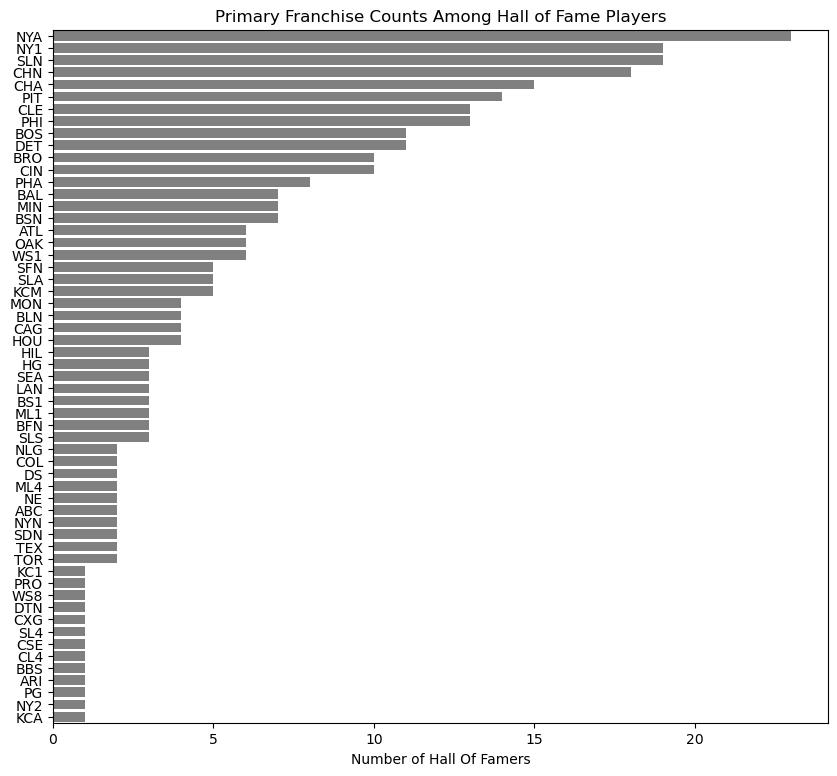

In [144]:

plt.figure(figsize=(10, 9))
sns.barplot(
    data = q3_7,
    y = 'teamid',
    x = 'hof_count',
    edgecolor=None, color = 'grey',
    dodge=False,
    linewidth=1,
)
plt.ylabel('')
plt.xlabel('Number of Hall Of Famers')
plt.title('Primary Franchise Counts Among Hall of Fame Players')


The plot shows which MLB franchises have been the primary teams for the largest number of Hall of Fame players. Each count reflects the franchise for which an inducted player logged the most career appearances. The ranking reveals a strong historical concentration of Hall of Fame careers within a handful of storied clubs.

The New York Yankees (NYA) stand far above all others, reflecting their long history of attracting, developing, and retaining elite talent. The St. Louis Cardinals (SLN), Chicago White Sox (CHA), Chicago Cubs (CHN), and Pittsburgh Pirates (PIT) also appear prominently, each carrying a substantial legacy of Hall-caliber players. Beyond the top tier, the distribution tapers gradually, showing a long tail of franchises with only a few Hall of Famers primarily associated with them.

Overall, the pattern underscores the enduring dominance and historical prestige of a small group of franchises whose organizational stability, success, and player development pipelines have consistently supported legendary careers.

# Part IV — Player Comparison & Physical Profiles

## Q4.4 — Physical Traits at Debut

This question explores how the **average height** and **average weight** of MLB players at the time of their debut have changed across league history.  
The objective is to visualise long-term physical trends in the sport, understand how player body profiles have evolved, and identify key historical periods where size and mass increased more noticeably.

**Data source:** `q4_4.csv` (output of SQL query Q4.4)

In [145]:
q4_4 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q4_4.csv")
q4_4.head()

,debut_year,avg_weight,avg_height
0,1871,157.05,68.51
1,1872,166.90,68.52
2,1873,157.54,68.92
3,1874,159.50,67.82
4,1875,164.04,68.85


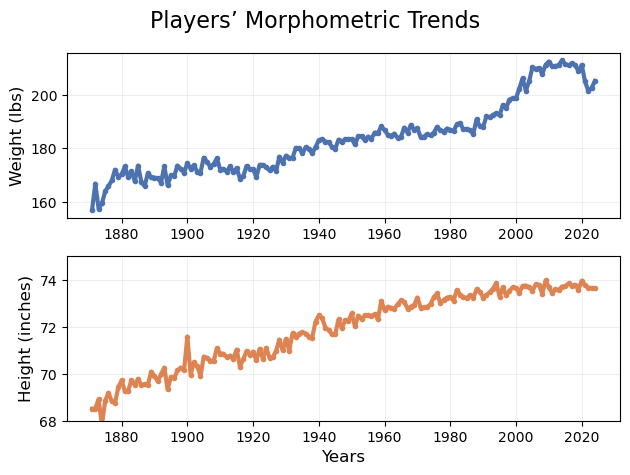

In [146]:
fig, (ax1, ax2) = plt.subplots(2, 1)


# --- Weight ---
ax1.plot(
    q4_4['debut_year'], q4_4['avg_weight'],
    color="#4C72B0",
    linewidth=3,
    marker="o",
    markersize=3,
    label="Average weight over time"
)

# --- Height ---
ax2.plot(
    q4_4['debut_year'], q4_4['avg_height'],
    color="#DD8452",
    linewidth=3,
    marker="o",
    markersize=3,
    label="Average height over time"
)

# Axes setup
ax1.set_ylabel("Weight (lbs)", fontsize=12)
ax2.set_ylabel("Height (inches)", fontsize=12)
ax2.set_xlabel("Years", fontsize=12)
ax2.set_ylim(68, 75)


ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)

fig.suptitle("Players’ Morphometric Trends", fontsize=16)
plt.subplots_adjust(top=0.92)

plt.tight_layout()


Average MLB player height and weight at debut have both increased over time, but at different rates. Height rose steadily from the 1870s to the 1930s, reaching roughly **6'1"**, and has remained relatively stable since then. Weight, by contrast, shows a pronounced long-term rise: from **160–175 lbs** in the 19th century to **180–195 lbs** by mid-century, and surpassing **200 lbs** from the 1990s onward. The steepest increases occur during the expansion era and into the power-hitting era of the late 20th century. Overall, players have become significantly heavier but only modestly taller, suggesting that MLB’s physical evolution has been driven primarily by increases in strength, conditioning, and muscularity rather than changes in stature.

## Q4.7 — Debut Physical Profiles by Era and League

This question examines how the physical traits of debuting MLB players vary across both historical eras and league affiliation (AL vs NL).  
For each player, we identify the **team and league they debuted with**, assign them to one of three broad eras (pre-1960, 1960–1989, and 1990–present), and compute average debut height and weight within each league–era combination.

The objective is to visualise long-term trends in player morphology and evaluate whether the American and National Leagues developed distinct physical profiles over time—or whether both leagues reflect similar patterns of athlete evolution.

**Data source:** `q4_7.csv` (output of SQL query Q4.7)

In [147]:
q4_7 = pd.read_csv("/Users/alejandrofp/Desktop/Projects/04_SQL_Portfolio/MLB_Analytics_Project/data/output/q4_7.csv")
q4_7

,era,league,avg_weight,avg_height
0,a_pre-1960,AL,177.38,71.39
1,a_pre-1960,NL,175.43,71.02
2,b_1960-1989,AL,187.19,73.15
3,b_1960-1989,NL,185.97,73.06
4,c_1990-present,AL,204.58,73.65
5,c_1990-present,NL,204.36,73.63


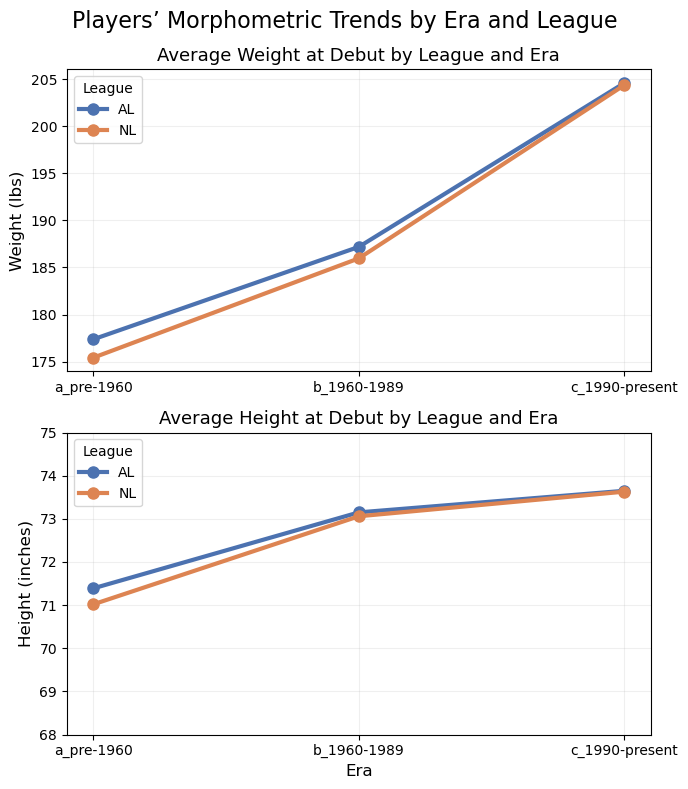

In [148]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8))

colors = {
    "AL": "#4C72B0",
    "NL": "#DD8452"
}

# --- Weight subplot ---
for league, d in q4_7.groupby("league"):
    ax1.plot(
        d["era"],
        d["avg_weight"],
        color=colors[league],
        linewidth=3,
        marker="o",
        markersize=8,
        label=league
    )

ax1.set_ylabel("Weight (lbs)", fontsize=12)
ax1.set_title("Average Weight at Debut by League and Era", fontsize=13)
ax1.grid(alpha=0.2)
ax1.legend(title="League")

# --- Height subplot ---
for league, d in q4_7.groupby("league"):
    ax2.plot(
        d["era"],
        d["avg_height"],
        color=colors[league],
        linewidth=3,
        marker="o",
        markersize=8,
        label=league
    )

ax2.set_ylabel("Height (inches)", fontsize=12)
ax2.set_xlabel("Era", fontsize=12)
ax2.set_title("Average Height at Debut by League and Era", fontsize=13)
ax2.set_ylim(68, 75)
ax2.grid(alpha=0.2)
ax2.legend(title="League")

fig.suptitle("Players’ Morphometric Trends by Era and League", fontsize=16)
plt.tight_layout()


The plots show that both MLB leagues underwent almost identical physical changes in debuting players across the last century. In the pre-1960 era, AL and NL players debuted at roughly the same size, averaging around **175–177 lbs** and **71–71.5 inches**. From 1960 to 1989, both leagues show a substantial jump in body mass (to **186–187 lbs**) and a moderate rise in height (to **≈73 inches**). The modern era (1990–present) continues that trajectory, with debut players reaching **205+ lbs** and **73.5–74 inches**, again with almost no separation between leagues.

What stands out is how tightly AL and NL trends track each other: the lines are nearly overlapping within each era for both height and weight. This indicates that despite historical differences in play styles, rules, and strategy between the two leagues, **the underlying physical profile of new MLB entrants has evolved in near lockstep**. The dominant pattern is not a league effect but a strong **era effect**, reflecting long-term changes in player development, training, and recruitment rather than differences between AL and NL scouting pipelines.

# --- END OF NOTEBOOK! ---